# 9. Модель кластеризации в машинном обучении

## Алгоритм K-means (K-средних)<a class='anchor' id='kmeans'>

1. Задайте число кластеров k.
2. Случайным образом выберите k точек из пространства признаков, которые будут центроидами кластеров.
3. Для каждого объекта в наборе данных найдите расстояние от этого объекта до каждого из k центроидов.
4. Припишите каждый объект к тому кластеру, центроид которого находится на минимальном расстоянии от данного объекта.
5. После того как все объекты распределены по кластерам, обновите положение каждого центроида, поместив его в центр масс объектов, принадлежащих этому кластеру.
6. Если центроиды больше не меняют своё положение после обновления, то процесс завершён. В противном случае повторите шаги 3–5 до тех пор, пока центроиды не перестанут двигаться.

Сгенерируем три облака точек с помощью `sklearn`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs #датасет точек

In [ ]:
X, y = make_blobs(n_samples=100, random_state=10) # выбрать количество точек данных

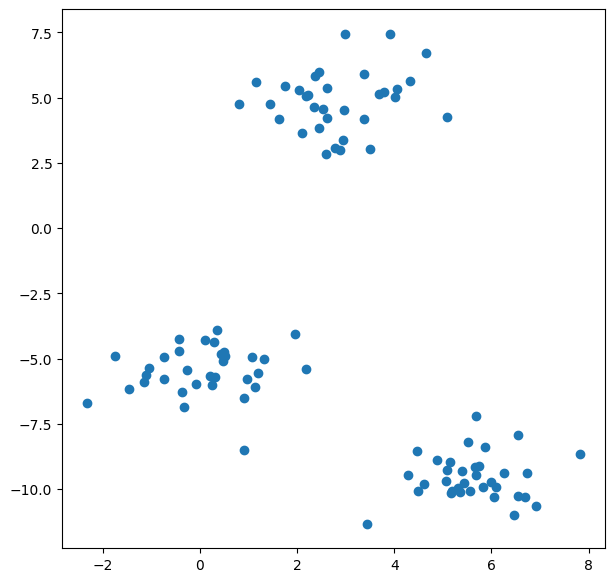

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

### Инициализируем центроиды

Алгоритм :

1. Выбрать количество кластеров $k$, на которые будут делиться данные.


In [ ]:
k = 3

2. Случайным образом выбрать в пространстве данных $k$ точек $c_{k}$ (центроидов) - центров будущих кластеров.



In [ ]:
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [ ]:
centroids = X[centroid_ids] # id центроидов
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

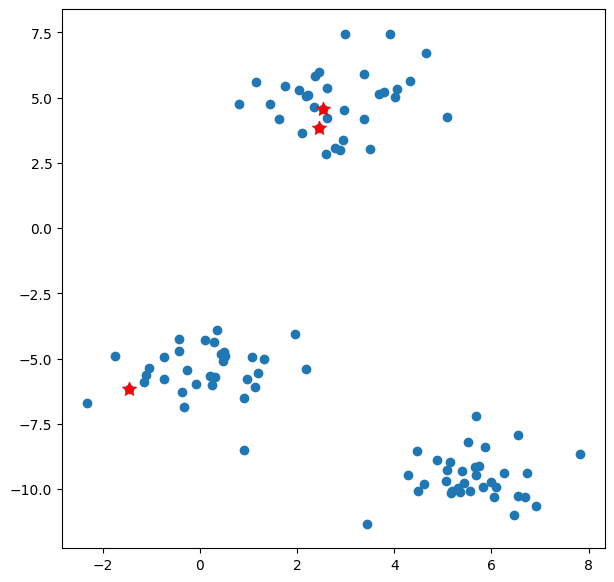

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, color='red');


3. Для каждой точки из выборки посчитать, к какому из центроидов она ближе.

В качестве метрики для расстояния в 2d пространстве будем использовать евклидово расстояние

$$d = \sqrt{{(p_1 - q_1)^2}+(p_2 - q_2)^2}$$

In [ ]:
colors = ['green', 'orange', 'red']

#### Первая итерация обучения

Создадим словарь для кластеризации

In [ ]:
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [ ]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.37979515, 4.18880872]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([2.61105267, 4.22218469]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array

In [ ]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(25, 67, 8)

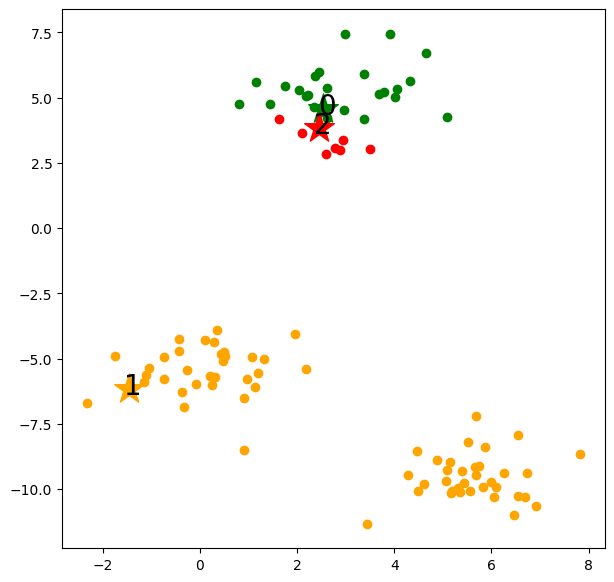

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i}', fontsize=20);

Пересчитаем центроиды как среднее по кластерам


In [ ]:
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

In [ ]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

new_centroids

{0: array([2.91329082, 5.33493484]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.61305824, 3.369246  ])}

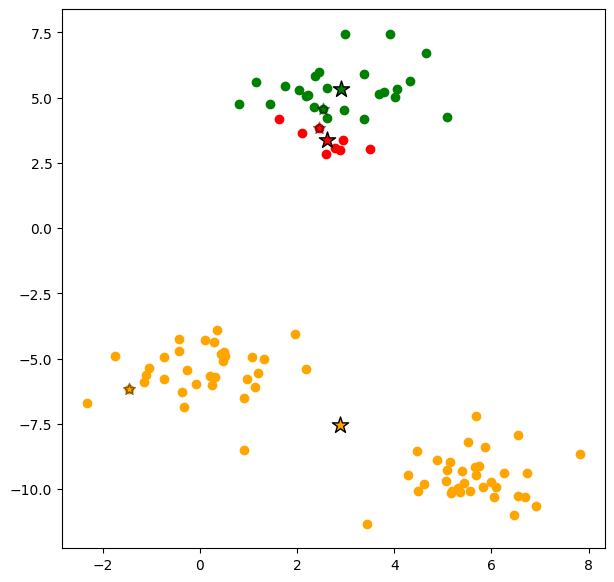

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], s=80, c=colors[i], marker='*', alpha=0.5, edgecolors='black')

for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], marker='*', s=150, c=colors[i], edgecolors='black')

#### Вторая итерация обучения


5. Повторить шаги 3-4 до сходимости алгоритма (обычно это оценивается по величине смещения центроида после каждого шага - сходимость означает непревышение смещения какого-то заданного значения).

In [ ]:
new_centroids = dict(sorted(new_centroids.items()))
new_centroids = np.array(list(new_centroids.values()))
centroids = new_centroids.copy()
centroids

array([[ 2.91329082,  5.33493484],
       [ 2.89504171, -7.53408753],
       [ 2.61305824,  3.369246  ]])

In [ ]:
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [ ]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array([  6.04774884, -10.30504657]),
  array([-0.42084194, -4.24889336]),
 

In [ ]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(23, 67, 10)

In [ ]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

new_centroids

{0: array([2.90614881, 5.43314686]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.68953138, 3.53649614])}

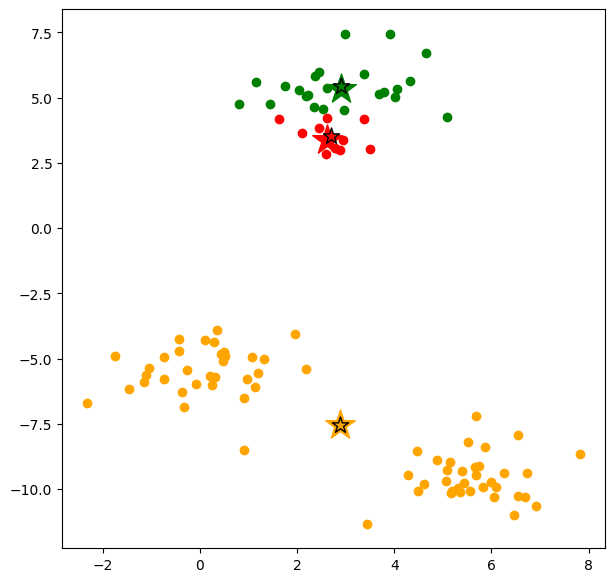

In [ ]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])

for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], marker='*', s=150, c=colors[i], edgecolors='black')

# Cлучайная стартовая инициализация центроидов приводит к проблемам


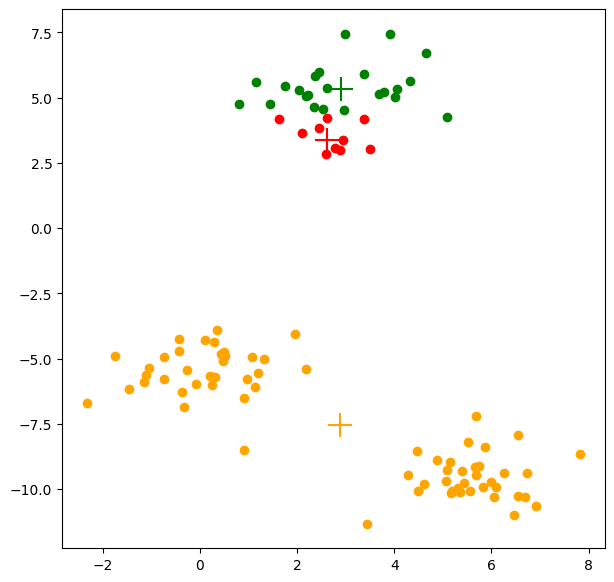

In [ ]:

plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='+', s=300, c=colors[i])

## KMeans в sklearn

In [ ]:
 # Не перебираем случайность, а применяем способ инициализации центроид с помощью KMeans++

from sklearn.cluster import KMeans #реализован в библиотеке sklearn

model = KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=1, verbose=1) # указываем параметры модели n_init='auto'

model.fit(X) # обучаем модель

Initialization complete
Iteration 0, inertia 297.3544277089618.
Iteration 1, inertia 186.3658862010145.
Converged at iteration 1: strict convergence.


KMeans(n_clusters=3, random_state=1, verbose=1)

In [ ]:
# проверяем кластиризует наша модель или нет
labels = model.predict(X)
labels

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0], dtype=int32)

In [ ]:
# выводим координаты центроид
model.cluster_centers_

array([[ 5.6183469 , -9.54288499],
       [ 2.84050716,  4.85840422],
       [ 0.08921213, -5.46441742]])

In [ ]:
colors=['red', 'green', 'orange']

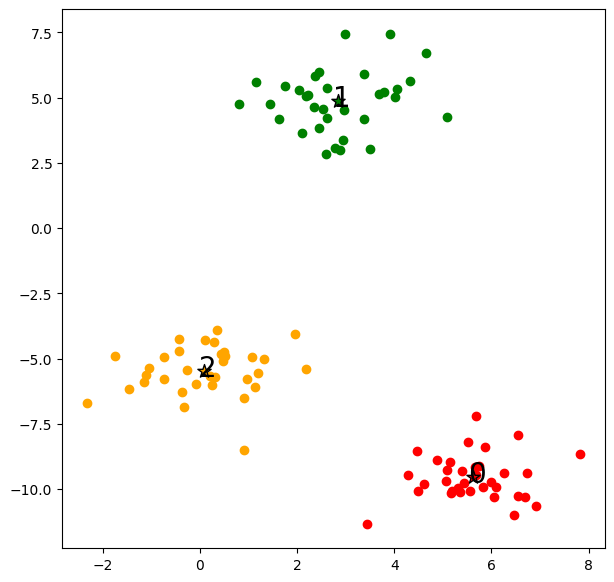

In [ ]:
# финальный график при k-means++ c центродами

plt.figure(figsize=(7, 7))

for i in range(len(labels)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])

for i, centr in enumerate(model.cluster_centers_):
    plt.scatter(centr[0], centr[1], marker='*', s=100, c=colors[i], edgecolor='black')
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i}', fontsize=20);

# Метод локтя для определения $k$

Initialization complete
Iteration 0, inertia 7699.678975786765.
Iteration 1, inertia 4372.460950204313.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3297.6730231819697.
Iteration 1, inertia 2012.5842596755779.
Iteration 2, inertia 1956.9182208998525.
Iteration 3, inertia 1735.8462330931006.
Iteration 4, inertia 1118.727740997325.
Iteration 5, inertia 976.8773336900748.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 297.3544277089618.
Iteration 1, inertia 186.3658862010145.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 230.2898232434193.
Iteration 1, inertia 170.54127710556108.
Iteration 2, inertia 167.9104332004399.
Iteration 3, inertia 165.24287272787424.
Iteration 4, inertia 163.3173948779104.
Iteration 5, inertia 162.73939332293946.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 200.36831642398275.
Iteratio

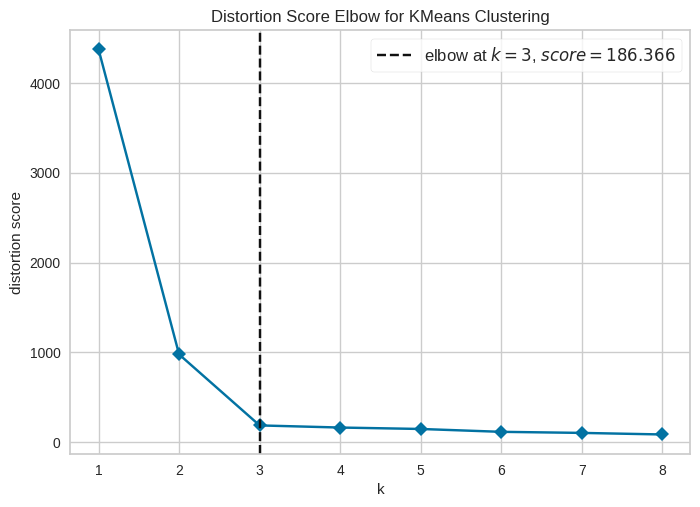

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(1,9), timings=False)

visualizer.fit(X)
visualizer.show();

## Агломеративный кластеринг

`Агломеративная кластеризация` — это иерархический метод кластеризации "снизу вверх", который последовательно объединяет близкие объекты или кластеры в более крупные группы. Вот ключевые аспекты алгоритма:

**Основные концепции**

**Иерархический подход:**
- Каждый объект изначально считается отдельным кластером.
- На каждом шаге объединяются два ближайших кластера.
- Процесс продолжается, пока все объекты не войдут в один кластер (или пока не будет достигнуто заданное число кластеров).

**Шаги алгоритма**

1) Инициализация: Каждая точка данных становится отдельным кластером.

2) Расчёт матрицы расстояний: Определяются расстояния между всеми парами кластеров.

3) Объединение кластеров:

- Выбираются два кластера с наименьшим расстоянием между ними.
- Они объединяются в новый кластер.
- атрица расстояний обновляется с учётом новой группы.

4) Повторение: Шаги 2–3 повторяются, пока не останется один кластер или заданное количество кластеров.


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

In [ ]:
# 1. Генерация случайных данных

n_samples = 500
n_features = 2
n_clusters_true = 5 # настоящее количество кластеров

X, _ = make_blobs(n_samples=n_samples, centers=n_clusters_true, n_features=n_features, random_state=42)

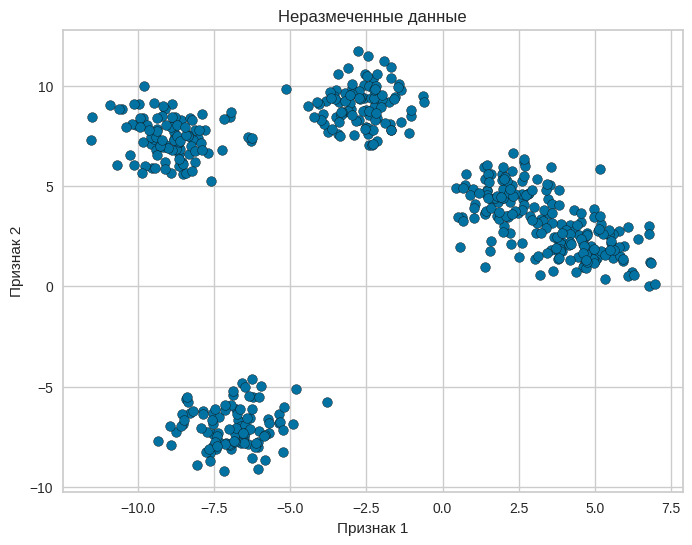

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], edgecolors='k')
plt.title("Неразмеченные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

## **Меры расстояний при агломеративном кластеринге**

**1️⃣ Single Linkage (ближняя связь)**

- Расстояние между двумя кластерами определяется как расстояние между их ближайшими точками.
- На каждом шаге объединяются два кластера, у которых минимальное расстояние между ближайшими точками.

**2️⃣ Complete Linkage (дальняя связь)**

- Расстояние между двумя кластерами — это максимальное расстояние между их точками.
- На каждом шаге объединяются два кластера, у которых наименьшее максимальное расстояние.

**3️⃣ Average Linkage (средняя связь)**

- Расстояние между двумя кластерами — это среднее расстояние между всеми точками одного кластера и всеми точками другого.
- Более сбалансированный вариант между single и complete linkage.


**4️⃣ Ward Linkage (метод Уорда)**

- На каждом шаге объединяются те два кластера, при объединении которых увеличение внутрикластерной дисперсии (разброса) будет минимальным.
- Минимизирует сумму квадратов отклонений точек от центроида кластера.



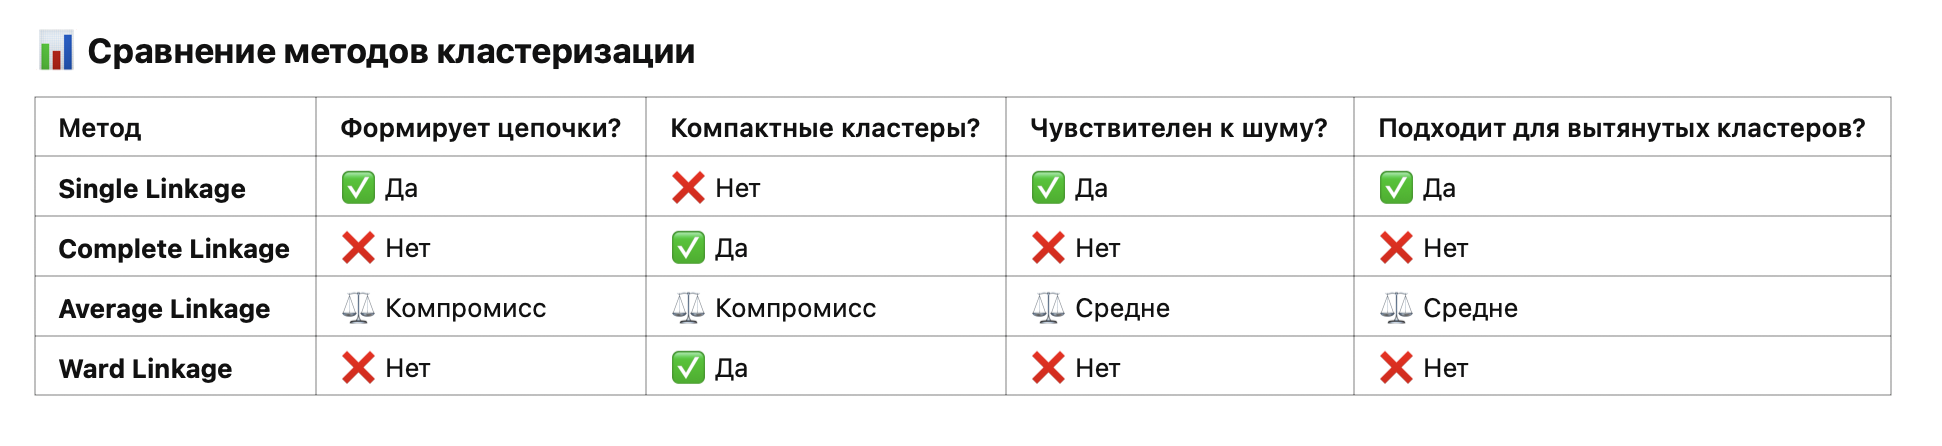

🚀 Как выбрать метод?

- ✅ Single linkage — если хотите найти длинные, вытянутые кластеры.
- ✅ Complete linkage — если вам нужны плотные, равномерные кластеры.
- ✅ Average linkage — если кластеры разного размера и формы.
- ✅ Ward linkage — если ожидаете компактные, равномерные группы (самый популярный метод).

**Если не уверены, Ward linkage — хороший универсальный выбор! 🎯**

# 2. Строим дендрограмму

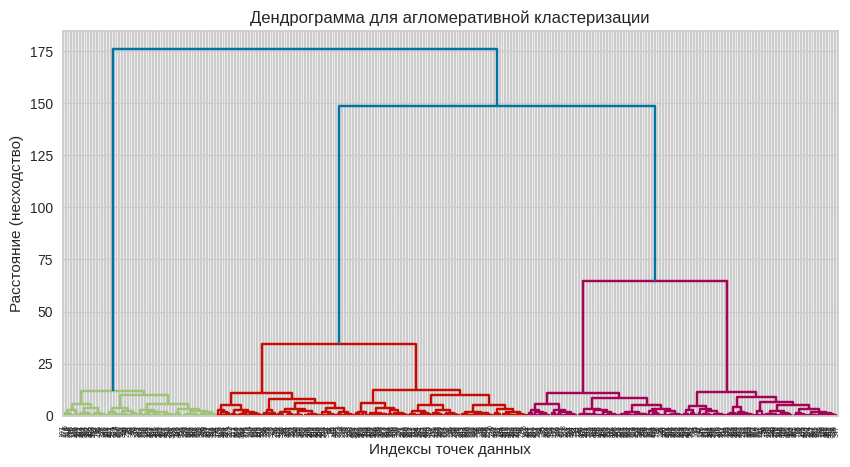

In [ ]:

linked = sch.linkage(X, method='ward')
plt.figure(figsize=(10, 5))
sch.dendrogram(linked)
plt.title("Дендрограмма для агломеративной кластеризации")
# plt.axhline(y=10, color='r', linestyle='--') # хардкод - мысленная линия
plt.xlabel("Индексы точек данных")
plt.ylabel("Расстояние (несходство)")
plt.show()

**Как читать дендрограмму?**

Дендрограмма — это дерево, визуализирующее процесс агломеративной кластеризации.

Основные элементы:
- Ось X — индексы объектов.
- Ось Y — расстояние (или мера несходства) между кластерами на момент их объединения.
- Ветви — соединяют точки (кластеры), отражая процесс объединения.
- Высота соединений — чем выше точка слияния, тем более различными были объединяемые кластеры.

Как интерпретировать:
- Чтобы выбрать количество кластеров, мысленно проведите горизонтальную линию на некоторой высоте. Число кластеров будет равно количеству несоединённых ветвей, пересекаемых этой линией.
- Чем выше объединение, тем сильнее различаются кластеры, и наоборот.

# 3. Применяем агломеративная кластеризацию


In [ ]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward') # single , complete, average
labels = model.fit_predict(X)
print(labels)

[0 0 0 0 1 0 1 0 3 3 0 0 0 0 2 2 0 2 1 0 0 2 1 2 3 2 3 2 1 0 3 3 3 0 0 3 2
 0 2 3 2 0 3 2 3 1 3 2 1 1 1 3 0 0 0 0 0 2 2 1 1 3 0 1 3 0 0 1 0 0 0 0 0 0
 0 0 0 3 2 1 1 3 0 2 1 2 0 0 3 0 0 1 0 1 3 0 3 1 0 0 0 0 3 0 3 1 1 1 1 1 0
 3 0 0 1 0 2 2 1 0 2 0 0 0 0 1 3 0 1 0 0 2 0 2 0 2 1 0 0 0 1 1 2 1 1 2 0 1
 2 0 2 0 3 3 3 2 0 0 1 3 0 3 1 2 2 1 2 0 0 2 0 0 2 0 1 0 3 3 1 0 3 3 1 0 2
 3 1 3 3 0 0 0 0 3 2 2 2 0 2 0 0 3 3 2 0 3 3 2 0 0 1 0 2 0 0 0 2 2 1 3 3 2
 3 0 3 0 0 3 2 0 0 3 3 0 1 0 2 1 3 1 2 2 3 1 0 0 1 2 3 0 0 1 0 3 1 3 0 0 3
 0 0 0 3 0 3 2 1 0 3 0 2 3 3 0 0 3 3 3 0 0 2 3 1 0 3 2 0 1 0 0 1 2 3 3 0 2
 0 2 1 2 0 1 0 0 1 3 0 2 2 1 0 1 2 1 1 0 0 0 1 0 0 0 1 0 0 0 2 1 0 0 2 2 0
 0 0 0 0 3 0 0 0 1 0 0 0 1 3 2 3 0 1 1 0 1 0 0 1 0 3 1 0 0 3 1 2 0 0 1 1 0
 0 3 2 0 2 2 0 0 1 0 0 2 2 0 3 2 0 2 3 2 0 1 0 1 3 3 1 2 1 2 3 3 3 1 0 1 0
 1 0 2 0 1 1 2 3 1 2 0 1 0 3 0 3 0 3 2 2 1 3 1 0 3 0 1 2 2 2 2 2 1 0 3 3 0
 1 0 0 3 2 2 2 3 0 1 0 0 3 1 2 1 0 2 0 1 2 0 2 1 3 0 0 1 2 3 2 0 3 3 0 0 3
 2 0 1 0 3 0 0 3 2 2 2 1 

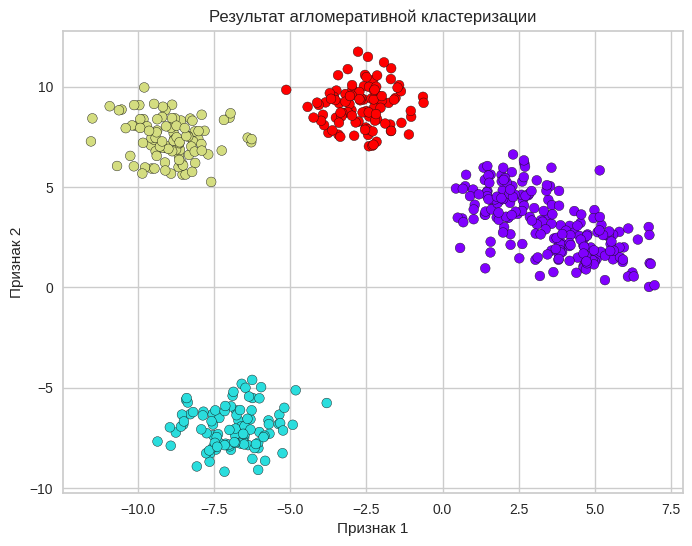

In [ ]:
# 4. Визуализация результатов кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', edgecolors='k')
plt.title("Результат агломеративной кластеризации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

In [ ]:
# Устанавливаем пороговое расстояние (например, 50% от максимального расстояния объединения)
threshold = 0.5 * max(linked[:, 2])
print(threshold)
labels = fcluster(linked, t=threshold, criterion='distance')

n_clusters = len(set(labels))
print(f"Оптимальное число кластеров: {n_clusters}")

87.990476770063
Оптимальное число кластеров: 3


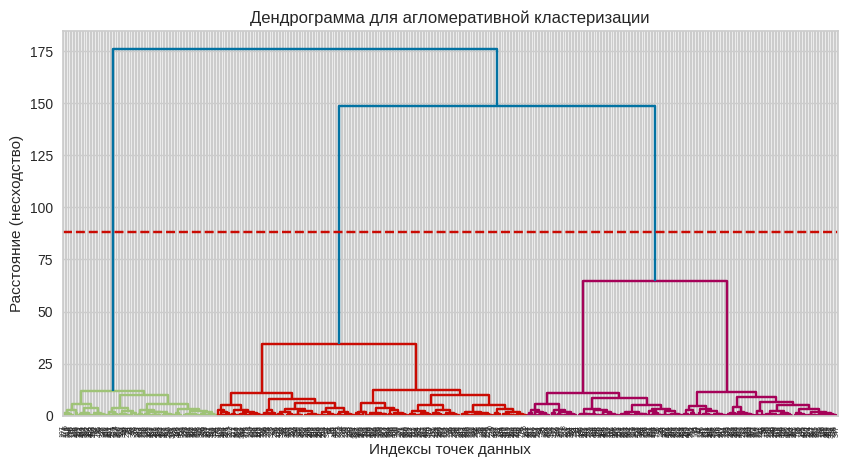

In [ ]:
plt.figure(figsize=(10, 5))
sch.dendrogram(linked)
plt.title("Дендрограмма для агломеративной кластеризации")
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel("Индексы точек данных")
plt.ylabel("Расстояние (несходство)")
plt.show()

# Алгоритм DBSCAN

**Основные концепции**

**Параметры:**
- $ε$ (eps): Радиус окрестности для поиска соседних точек.

- min_pts: Минимальное количество точек в $ε$-окрестности, чтобы точка считалась ядром.

**Типы точек:**

- 🔴 Ядро (Core point): Точка, у которой в $ε$-окрестности $≥$ min_pts соседей.
- 🟠 Граничная (Border point): Точка, попадающая в $ε$-окрестность ядра, но не имеющая достаточного числа соседей.
- ⚫ Шум (Noise): Точки, не являющиеся ни ядром, ни граничными.

**Шаги алгоритма**

1) Выбор случайной непосещенной точки.

2) Поиск всех точек, достижимых по плотности:
 - Если точка — ядро, формируется новый кластер.
 - Рекурсивно добавляются все достижимые точки (в пределах $ε$) из его окрестности.
 - Повтор для всех непосещенных точек.

3) Точки, не вошедшие в кластеры, помечаются как шум.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

X, _ = make_blobs(n_samples=500, centers=[(-5,0), (0,5), (5, -2)], cluster_std=[1.0, 1.0, 1.0], random_state=42)
X = StandardScaler().fit_transform(X)

# Подбор epsilon

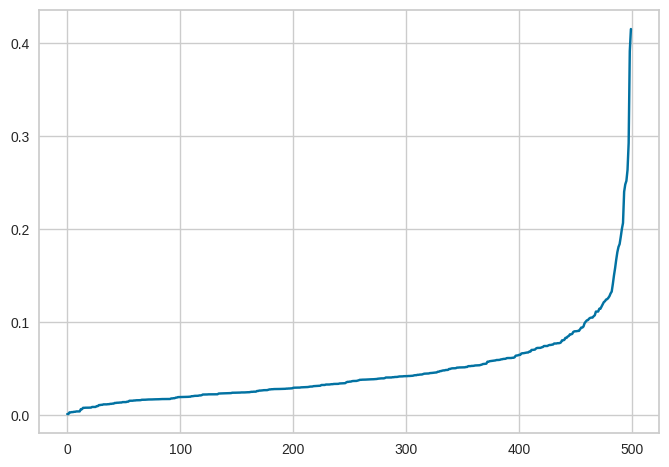

In [ ]:
neighbors = NearestNeighbors(n_neighbors=2) # если min_samples = 5, то количество соседей будет 4
neighbors = neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = distances[:,1]
distances.sort()

plt.plot(distances)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.25, min_samples=4)
labels = dbscan.fit_predict(X)

In [ ]:
labels

array([ 0,  0,  1,  2,  1,  0,  0,  0,  1,  1,  0,  2,  0,  0,  2,  2,  2,
        1,  1,  0,  1,  2,  2,  2,  0,  1,  0,  1,  2,  2,  2,  1,  0,  0,
        1,  1,  0,  1,  2,  2,  2,  1,  0,  0,  2,  1,  1,  0,  1,  1,  2,
        2,  2,  0, -1,  1,  0,  1,  1,  2,  2,  0,  0,  2,  0,  1,  2,  2,
        0,  1,  1,  1,  0,  1,  2,  1,  2,  0,  2,  2,  2,  2,  0,  1,  1,
        2,  0,  2,  1,  2,  1,  0,  1,  1,  1,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  2,  1,  2,  0,  1,  1,  0,  1,  2,  1,  0,  2,  2,  1,  1,
        2,  1,  0,  2,  0,  1,  1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,
        2,  2,  2,  1,  1,  0,  2,  0,  2,  1,  1,  0,  1,  0,  2,  2,  2,
        1,  1,  1,  2,  2,  0,  0,  2,  2,  1,  0,  1,  1,  1,  2,  2,  0,
        0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  2,  2,  0,  1,  2,  2,
        1,  0,  0,  0,  1,  2,  2,  0,  1,  1,  2,  2,  1,  2,  0,  0,  1,
        1,  2,  0,  2,  1,  2,  2,  1,  1,  0,  2,  1,  0,  2,  0,  2,  0,
        0,  0,  2,  2,  0

<ipython-input-84-13197337a0b2>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


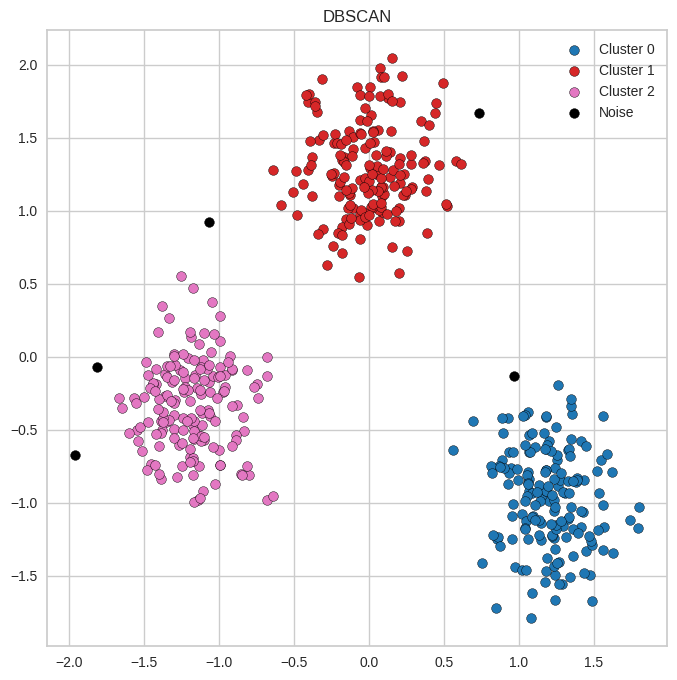

In [ ]:
plt.figure(figsize=(8,8))
unique_labels = set(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    mask = labels == label
    plt.scatter(X[mask,0], X[mask,1], c=[colors(label)] if label != -1 else "black", label=f"Cluster {label}" if label != -1 else "Noise", edgecolors="black")

plt.title("DBSCAN")
plt.legend()
plt.show()